In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_excel("1673873196_hr_comma_sep.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

No Missing values

In [9]:
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

satisfaction_level
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]


last_evaluation
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]


number_project
[2 5 7 6 4 3]


average_montly_hours
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 1

<AxesSubplot:>

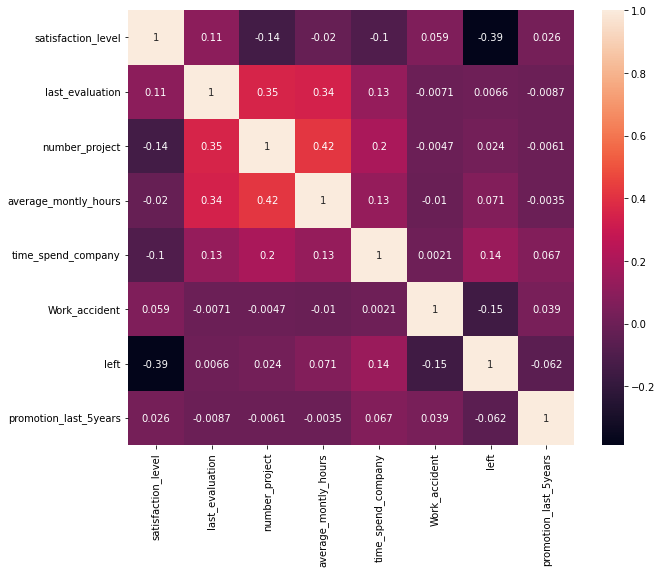

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [15]:
df1= df.groupby(["sales"])["left"].value_counts().reset_index(name="count")
df1=pd.DataFrame(df1)

In [18]:
dft = df["sales"].value_counts().reset_index(name="Total")

In [20]:
dft=dft.rename(columns={"index":"sales"})

In [22]:
dfmer=df1.merge(dft,how='left')
dfmer

,sales,left,count,Total
0,IT,0,954,1227
1,IT,1,273,1227
2,RandD,0,666,787
3,RandD,1,121,787
4,accounting,0,563,767
5,accounting,1,204,767
6,hr,0,524,739
7,hr,1,215,739
8,management,0,539,630
9,management,1,91,630


In [25]:
dfmer['%_left_on_sales']=dfmer['count']/(dfmer['Total'].values)
dfmer['%_left_on_sales']=dfmer['%_left_on_sales']*100

In [26]:
dfmer

,sales,left,count,Total,%_left_on_sales
0,IT,0,954,1227,77.750611
1,IT,1,273,1227,22.249389
2,RandD,0,666,787,84.625159
3,RandD,1,121,787,15.374841
4,accounting,0,563,767,73.402868
5,accounting,1,204,767,26.597132
6,hr,0,524,739,70.906631
7,hr,1,215,739,29.093369
8,management,0,539,630,85.555556
9,management,1,91,630,14.444444


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

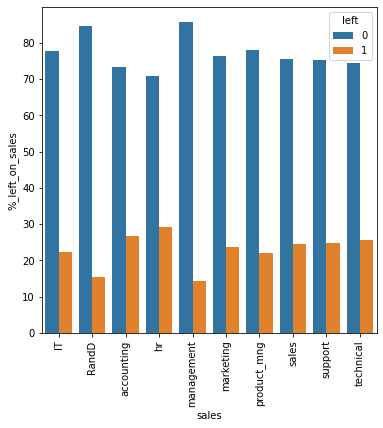

In [28]:
plt.figure(figsize=(6,6))
sns.barplot(x='sales',y='%_left_on_sales',hue='left',data=dfmer)
plt.xticks(rotation=90)

People from the hr department are leaving the highest based on the %_left_on_sales data.The Hr department has the highest percentage. %_left_on_sales = (Count of people from leaving category in a department)/(Total number of people in that department)*100

In [29]:
df1.head()

,sales,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

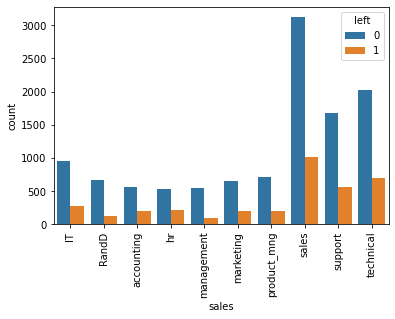

In [32]:
sns.barplot(x='sales',y='count',hue='left',data=df1)
plt.xticks(rotation=90)

In [33]:
df2=df.groupby(['salary'])['left'].value_counts().reset_index(name='count')
df2=pd.DataFrame(df2)

In [34]:
df2.head()

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129


(array([0, 1, 2]),
 [Text(0, 0, 'high'), Text(1, 0, 'low'), Text(2, 0, 'medium')])

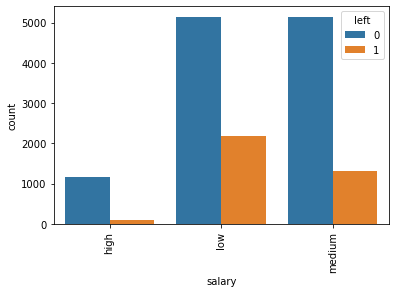

In [35]:
sns.barplot(x="salary",y='count',hue="left",data=df2)
plt.xticks(rotation=90)

People with Lower Salaries are leaving the company

In [37]:
df3=df.groupby(['time_spend_company'])['left'].value_counts().reset_index(name='count')
df3=pd.DataFrame(df3)

In [38]:
df3.head()

,time_spend_company,left,count
0,2,0,3191
1,2,1,53
2,3,0,4857
3,3,1,1586
4,4,0,1667


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '10')])

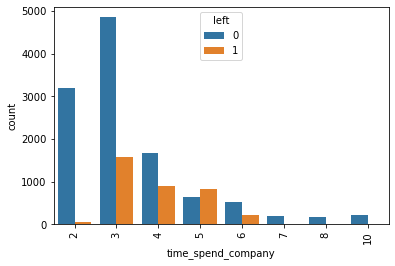

In [39]:
sns.barplot(x='time_spend_company',y='count',hue='left',data=df3)
plt.xticks(rotation=90)

people having 3 to 6 years of experience are leaving the company more

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

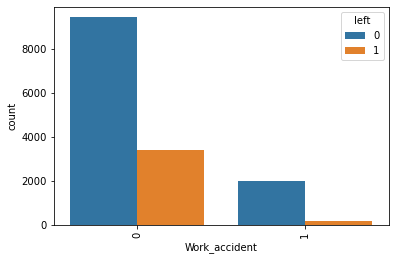

In [40]:
sns.countplot("Work_accident",hue="left",data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

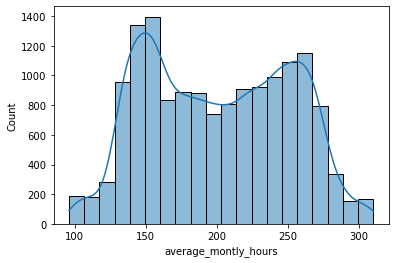

In [42]:
sns.histplot(data = df,x="average_montly_hours", kde = True,bins=20)

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

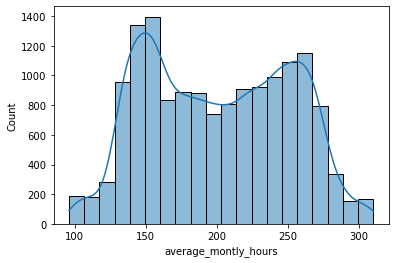

In [43]:
sns.histplot(data = df,x="average_montly_hours", kde = True,bins=20)

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

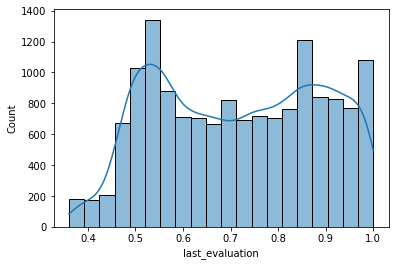

In [44]:
sns.histplot(data = df,x="last_evaluation", kde = True,bins=20)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7')])

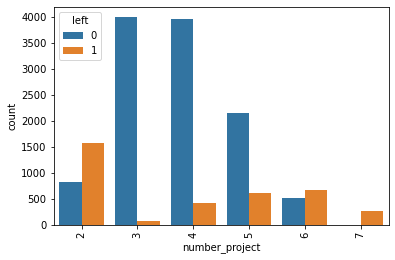

In [45]:
sns.countplot(x="number_project",hue="left",data=df)
plt.xticks(rotation=90)

In [46]:
dfclus = df[["satisfaction_level","last_evaluation","left"]]

In [47]:
from sklearn.cluster import KMeans

In [80]:
km=dfclus.iloc[:,:].values
kmeans=KMeans(n_clusters=3,random_state=42)
label=kmeans.fit_predict(dfclus)
labelrr=kmeans.fit_predict(km)

In [81]:
label

array([1, 1, 1, ..., 1, 1, 1])

In [82]:
dfclus[label==0].describe()

,satisfaction_level,last_evaluation,left
count,6713.000000,6713.000000,6713.0
mean,0.813270,0.739914,0.0
std,0.108112,0.154873,0.0
min,0.590000,0.360000,0.0
25%,0.720000,0.610000,0.0
50%,0.810000,0.740000,0.0
75%,0.910000,0.870000,0.0
max,1.000000,1.000000,0.0


In [83]:
km[label==0,1]

array([0.67, 0.82, 0.91, ..., 0.55, 0.95, 0.54])

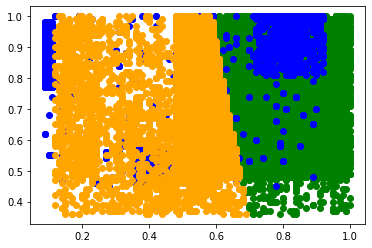

In [84]:
plt.scatter(km[label==0,0],km[label==0,1],color='green')
plt.scatter(km[label==1,0],km[label==1,1],color='blue')
plt.scatter(km[label==2,0],km[label==2,1],color='orange')

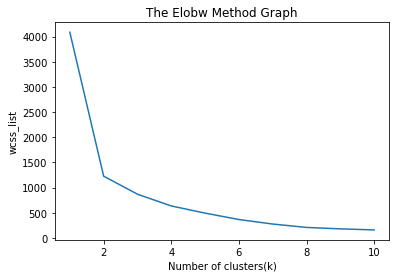

In [85]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(dfclus)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [86]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
label= kmeans.fit_predict(dfclus)

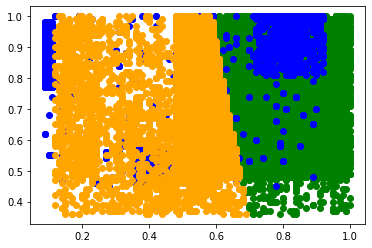

In [87]:
plt.scatter(km[label==0,0],km[label==0,1],color='green')
plt.scatter(km[label==1,0],km[label==1,1],color='blue')
plt.scatter(km[label==2,0],km[label==2,1],color='orange')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [92]:
df_numerical = df.select_dtypes(include=['float64','int64'])
df_categorical = df.select_dtypes(include=['object'])

In [93]:
df_converted = pd.get_dummies(df_categorical)

In [94]:
df_converted.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [97]:
data = pd.concat([df_numerical,df_converted],axis=1,join='inner')

In [98]:
data.shape

(14999, 21)

In [99]:
X=data.drop('left',axis=1)
y=data['left']

In [100]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123, stratify=data.left)

In [109]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11999, 20), (3000, 20), (11999,), (3000,))

In [110]:
y_train.value_counts()

0    9142
1    2857
Name: left, dtype: int64

data is highly imbalanced, Using SMOTE to handle the imbalance 'left' data

In [113]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression with only default settings
my_log_reg = LogisticRegression()

# Fit the logistic regression on the independent variables of the train data with buy as dependent variable
my_log_reg.fit(X_train,y_train)

# Make a prediction using our model on the test set
y_pred = my_log_reg.predict(X_test)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
print(cross_val_score(my_log_reg, X_train, y_train, cv=5).mean())

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.795149958315965


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  2114 
False positives:  172 
False negatives:  443 
True Positives:  271


In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2286
           1       0.61      0.38      0.47       714

    accuracy                           0.80      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.78      0.80      0.78      3000



In [125]:
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

In [126]:
roc_auc_score(y_test,y_pred)

0.6521556129013285

[0.         0.07524059 1.        ]
[0.         0.37955182 1.        ]
[2 1 0]
0.6521556129013285


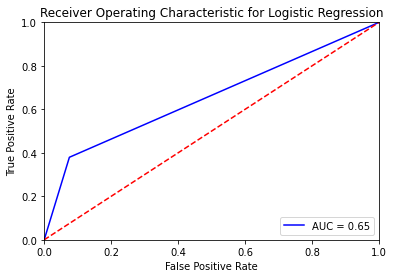

In [127]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I: plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Redoing the Logistic Regression with SMOTE

In [118]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)


In [117]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [119]:
y_resampled.value_counts()

0    9142
1    9142
Name: left, dtype: int64

In [121]:
log_reg_2 = LogisticRegression()

# Fit the model with the data that has been resampled with SMOTE
log_reg_2.fit(X_resampled, y_resampled)

# Predict on the test set (not resampled to obtain honest evaluation)
y_pred2 = log_reg_2.predict(X_test)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
print(cross_val_score(log_reg_2, X_resampled, y_resampled, cv=5).mean())

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.8013569492038588


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  1744 
False positives:  542 
False negatives:  158 
True positives:  556


True negatives: 1744 (was 2114 so this has reduced with SMOTE)
False positives: 542 (was 172 for so this has increased with SMOTE)
False negatives: 158 (was 443 so this has reduced with SMOTE)
True positives: 556 (was 271 so this has increased with SMOTE)

In [123]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2286
           1       0.51      0.78      0.61       714

    accuracy                           0.77      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.77      0.78      3000



Recall of non left went down from 0.92 to 0.76: there are more nonleft that we did not succeed to find
Recall of left went up from 0.38 to 0.78: we succeeded to identify many more left
The precision of left went down from 0.61 to 0.51: the cost of correctly identifying more left is that we now also incorrectly identify more left (identifying left while they are actually nonleft)!

In [128]:
roc_auc_score(y_test, y_pred2)

0.7708080607571112

[0.         0.23709536 1.        ]
[0.         0.77871148 1.        ]
[2 1 0]
0.7708080607571112


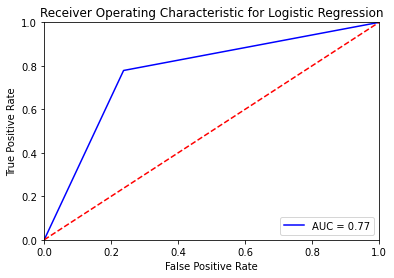

In [129]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred2)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I: plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf = RandomForestClassifier(max_depth=5)

In [137]:
print(cross_val_score(rf, X_resampled, y_resampled, cv=5).mean())

0.9464013441444094


In [140]:
rf.fit(X_resampled, y_resampled)
ypred1=rf.predict(X_test)

In [141]:
tn, fp, fn, tp = confusion_matrix(y_test, ypred1).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  2212 
False positives:  74 
False negatives:  66 
True positives:  648


In [142]:
print(classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2286
           1       0.90      0.91      0.90       714

    accuracy                           0.95      3000
   macro avg       0.93      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000



In [143]:
roc_auc_score(y_test, ypred1)

0.9375960357896439

[0.         0.03237095 1.        ]
[0.         0.90756303 1.        ]
[2 1 0]
0.9375960357896439


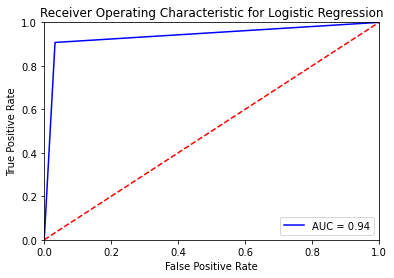

In [144]:
fpr, tpr, threshold = metrics.roc_curve(y_test, ypred1)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I: plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gradient Boosting Classifier

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

In [146]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [147]:
print(cross_val_score(gb, X_resampled, y_resampled, cv=5).mean())

0.94968297662407


In [148]:
gb.fit(X_resampled, y_resampled)
ypred3=gb.predict(X_test)

In [149]:
tn, fp, fn, tp = confusion_matrix(y_test, ypred3).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  2170 
False positives:  116 
False negatives:  52 
True positives:  662


In [150]:
print(classification_report(y_test, ypred3))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.85      0.93      0.89       714

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.93      3000
weighted avg       0.95      0.94      0.94      3000



In [151]:
roc_auc_score(y_test, ypred3)

0.9382136056522347

[0.         0.05074366 1.        ]
[0.         0.92717087 1.        ]
[2 1 0]
0.9382136056522347


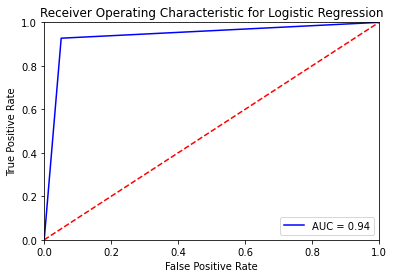

In [152]:
fpr, tpr, threshold = metrics.roc_curve(y_test, ypred3)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I: plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Based on the confusion matrix, the false negatives should be low because if an employee who might leave the organisation is misclassified as someone who won't leave then proper strategies to retain that person will not be implemented on him or her. Hence Recall is better metric to be used

In [153]:
col = X_resampled.columns

In [154]:
col

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

Since Random Forest shows the highest accuracy with good f1 score, we will conclude that to be our best performing model.

In [155]:
feature_labels = np.array(col)

In [161]:
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

sales_accounting-0.01%
sales_hr-0.01%
sales_support-0.01%
sales_technical-0.02%
sales_marketing-0.02%
sales_product_mng-0.03%
sales_sales-0.08%
sales_IT-0.10%
promotion_last_5years-0.14%
sales_management-0.17%
salary_medium-0.27%
sales_RandD-0.31%
salary_low-0.67%
salary_high-1.46%
Work_accident-3.98%
last_evaluation-10.82%
average_montly_hours-12.51%
number_project-20.37%
time_spend_company-22.14%
satisfaction_level-26.89%


The above lists the factors that influences the turnover in the ascending order. It can be identified that the employee turnover is highly influenced by the employee's satisfaction level in the organisation. Improvement of work culture within the organiation can be a good way to prevent the employees from leaving the organisation.

In [163]:
predict_probability = rf.predict_proba(X_test)

In [164]:
predict_probability[:,1]

array([0.06312406, 0.56770414, 0.25686275, ..., 0.16769006, 0.13556704,
       0.63897472])

In [165]:
zone=[]
prob=[]

for i in predict_probability[:,1]:
    prob.append(i)
    if(i<=0.2):
        zone.append('safe zone')
    elif (i>0.2 and i<=0.6):
        zone.append('low risk zone')
    elif (i>0.6 and i<=0.9):
        zone.append('medium risk zone')
    else:
        zone.append('High risk zone')

In [176]:
categories = ['safe zone','low risk zone','medium risk zone','High risk zone']
color=['green','blue','red','yellow']

In [177]:
colordict = dict(zip(categories,color))

In [178]:
clr = pd.DataFrame({'Zone':zone,'Probability':prob})

In [179]:
clr['Zone'].unique()

array(['safe zone', 'low risk zone', 'medium risk zone', 'High risk zone'],
      dtype=object)

In [180]:
clr["color"] = clr["Zone"].apply(lambda x: colordict[x])

In [181]:
clr.head(10)
     

,Zone,Probability,color
0,safe zone,0.063124,green
1,low risk zone,0.567704,blue
2,low risk zone,0.256863,blue
3,safe zone,0.076856,green
4,safe zone,0.091135,green
5,safe zone,0.093949,green
6,safe zone,0.147376,green
7,safe zone,0.137465,green
8,safe zone,0.187444,green
9,safe zone,0.085523,green


In [183]:
color= clr["color"].tolist()

In [184]:
c=['green','blue','red','yellow']

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

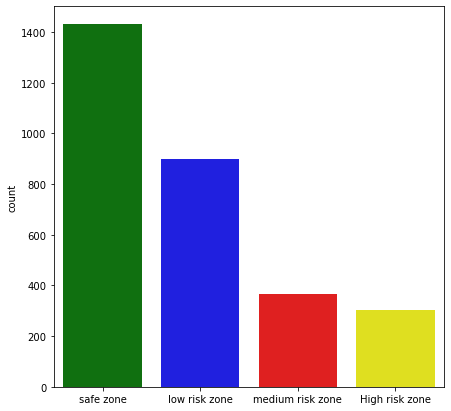

In [185]:
plt.figure(figsize=(7,7))
sns.countplot(zone,palette=c)